<a href="https://colab.research.google.com/github/rosangithub/ANIDS/blob/main/ANIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anomaly Based Network Intrusion Detection System using Ensemble Machine learning


In [1]:
import numpy as np#linear algebra
import pandas as pd#data preprocessing,CSV files
import pickle#saving and loading trained model
from os import path
#importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import(StandardScaler,OrdinalEncoder,LabelEncoder,MinMaxScaler,OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer,MaxAbsScaler,RobustScaler,PowerTransformer
#importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
import glob
#path to your folder containing csv files
folder_path="/content/drive/MyDrive/data/raw/"
#get  a list of all csv files in the folder
csv_files=glob.glob(folder_path + "*.csv")
#Read all the csv files and combine them into one dataframe
df_list=(pd.read_csv(file) for file in csv_files)
df=pd.concat(df_list,ignore_index=True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [18]:
#display the shape and the find the concatinated dataframe
nRow,nCol=df.shape
print(f"Rows:{nRow},Columns: {nCol}")


Rows:2830743,Columns: 79


In [19]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [21]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [22]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [25]:
df.columns=df.columns.str.strip()
df['Label'].value_counts()

,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


Remove the missing values NaN from the dataframe

In [26]:
df.dropna(inplace=True)

In [27]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,61374,61,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,61378,72,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,61375,75,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,61323,48,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Plotting the histogram of the data

In [37]:
import matplotlib.pyplot as plt  # for plotting graphs
import numpy as np               # for numerical operations and dtype checking
%matplotlib inline

def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    """
    This function plots the distribution of values for multiple columns in a DataFrame.
    Numeric columns are shown as histograms.
    Categorical columns (with few unique values) are shown as bar charts.

    Parameters:
    df: pandas DataFrame
        The dataset containing columns to plot
    n_graph_shown: int
        Maximum number of columns to plot
    n_graph_per_row: int
        Number of plots to show in each row
    """

    # Count unique values in each column
    nunique = df.nunique()

    # Select columns with 2 to 49 unique values for plotting
    columns_to_plot = df.columns[(nunique > 1) & (nunique < 50)]
    print(columns_to_plot)

    # Create a smaller DataFrame containing only selected columns
    df_to_plot = df[columns_to_plot]

    # Get the number of rows and columns in the filtered DataFrame
    n_rows, n_cols = df_to_plot.shape

    # Calculate how many rows of plots we need in the figure
    n_graph_row = (n_cols + n_graph_per_row - 1) // n_graph_per_row  # integer division

    # Create the figure with calculated size
    plt.figure(num=None,
               figsize=(6 * n_graph_per_row, 8 * n_graph_row),  # width x height in inches
               dpi=80,                                         # resolution
               facecolor='w',                                  # figure background color
               edgecolor='k')                                  # figure border color

    # Loop through each selected column (up to n_graph_shown)
    for i, col_name in enumerate(columns_to_plot[:n_graph_shown]):
        # Create a subplot in the grid
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)

        # Get data of the current column
        column_data = df_to_plot[col_name]

        # Check if the column is numeric
        if np.issubdtype(column_data.dtype, np.number):
            # If numeric, plot histogram
            column_data.hist()
        else:
            # If categorical, count unique values and plot bar chart
            value_counts = column_data.value_counts()
            value_counts.plot.bar()

        # Label y-axis
        plt.ylabel('counts')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)

        # Set the title of the subplot using f-string
        plt.title(f'{col_name} (column {i})')

    # Adjust spacing between subplots to prevent overlap
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

    # Display the figure
    plt.show()


Index(['Fwd PSH Flags', 'Fwd URG Flags', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'min_seg_size_forward', 'Label'],
      dtype='object')


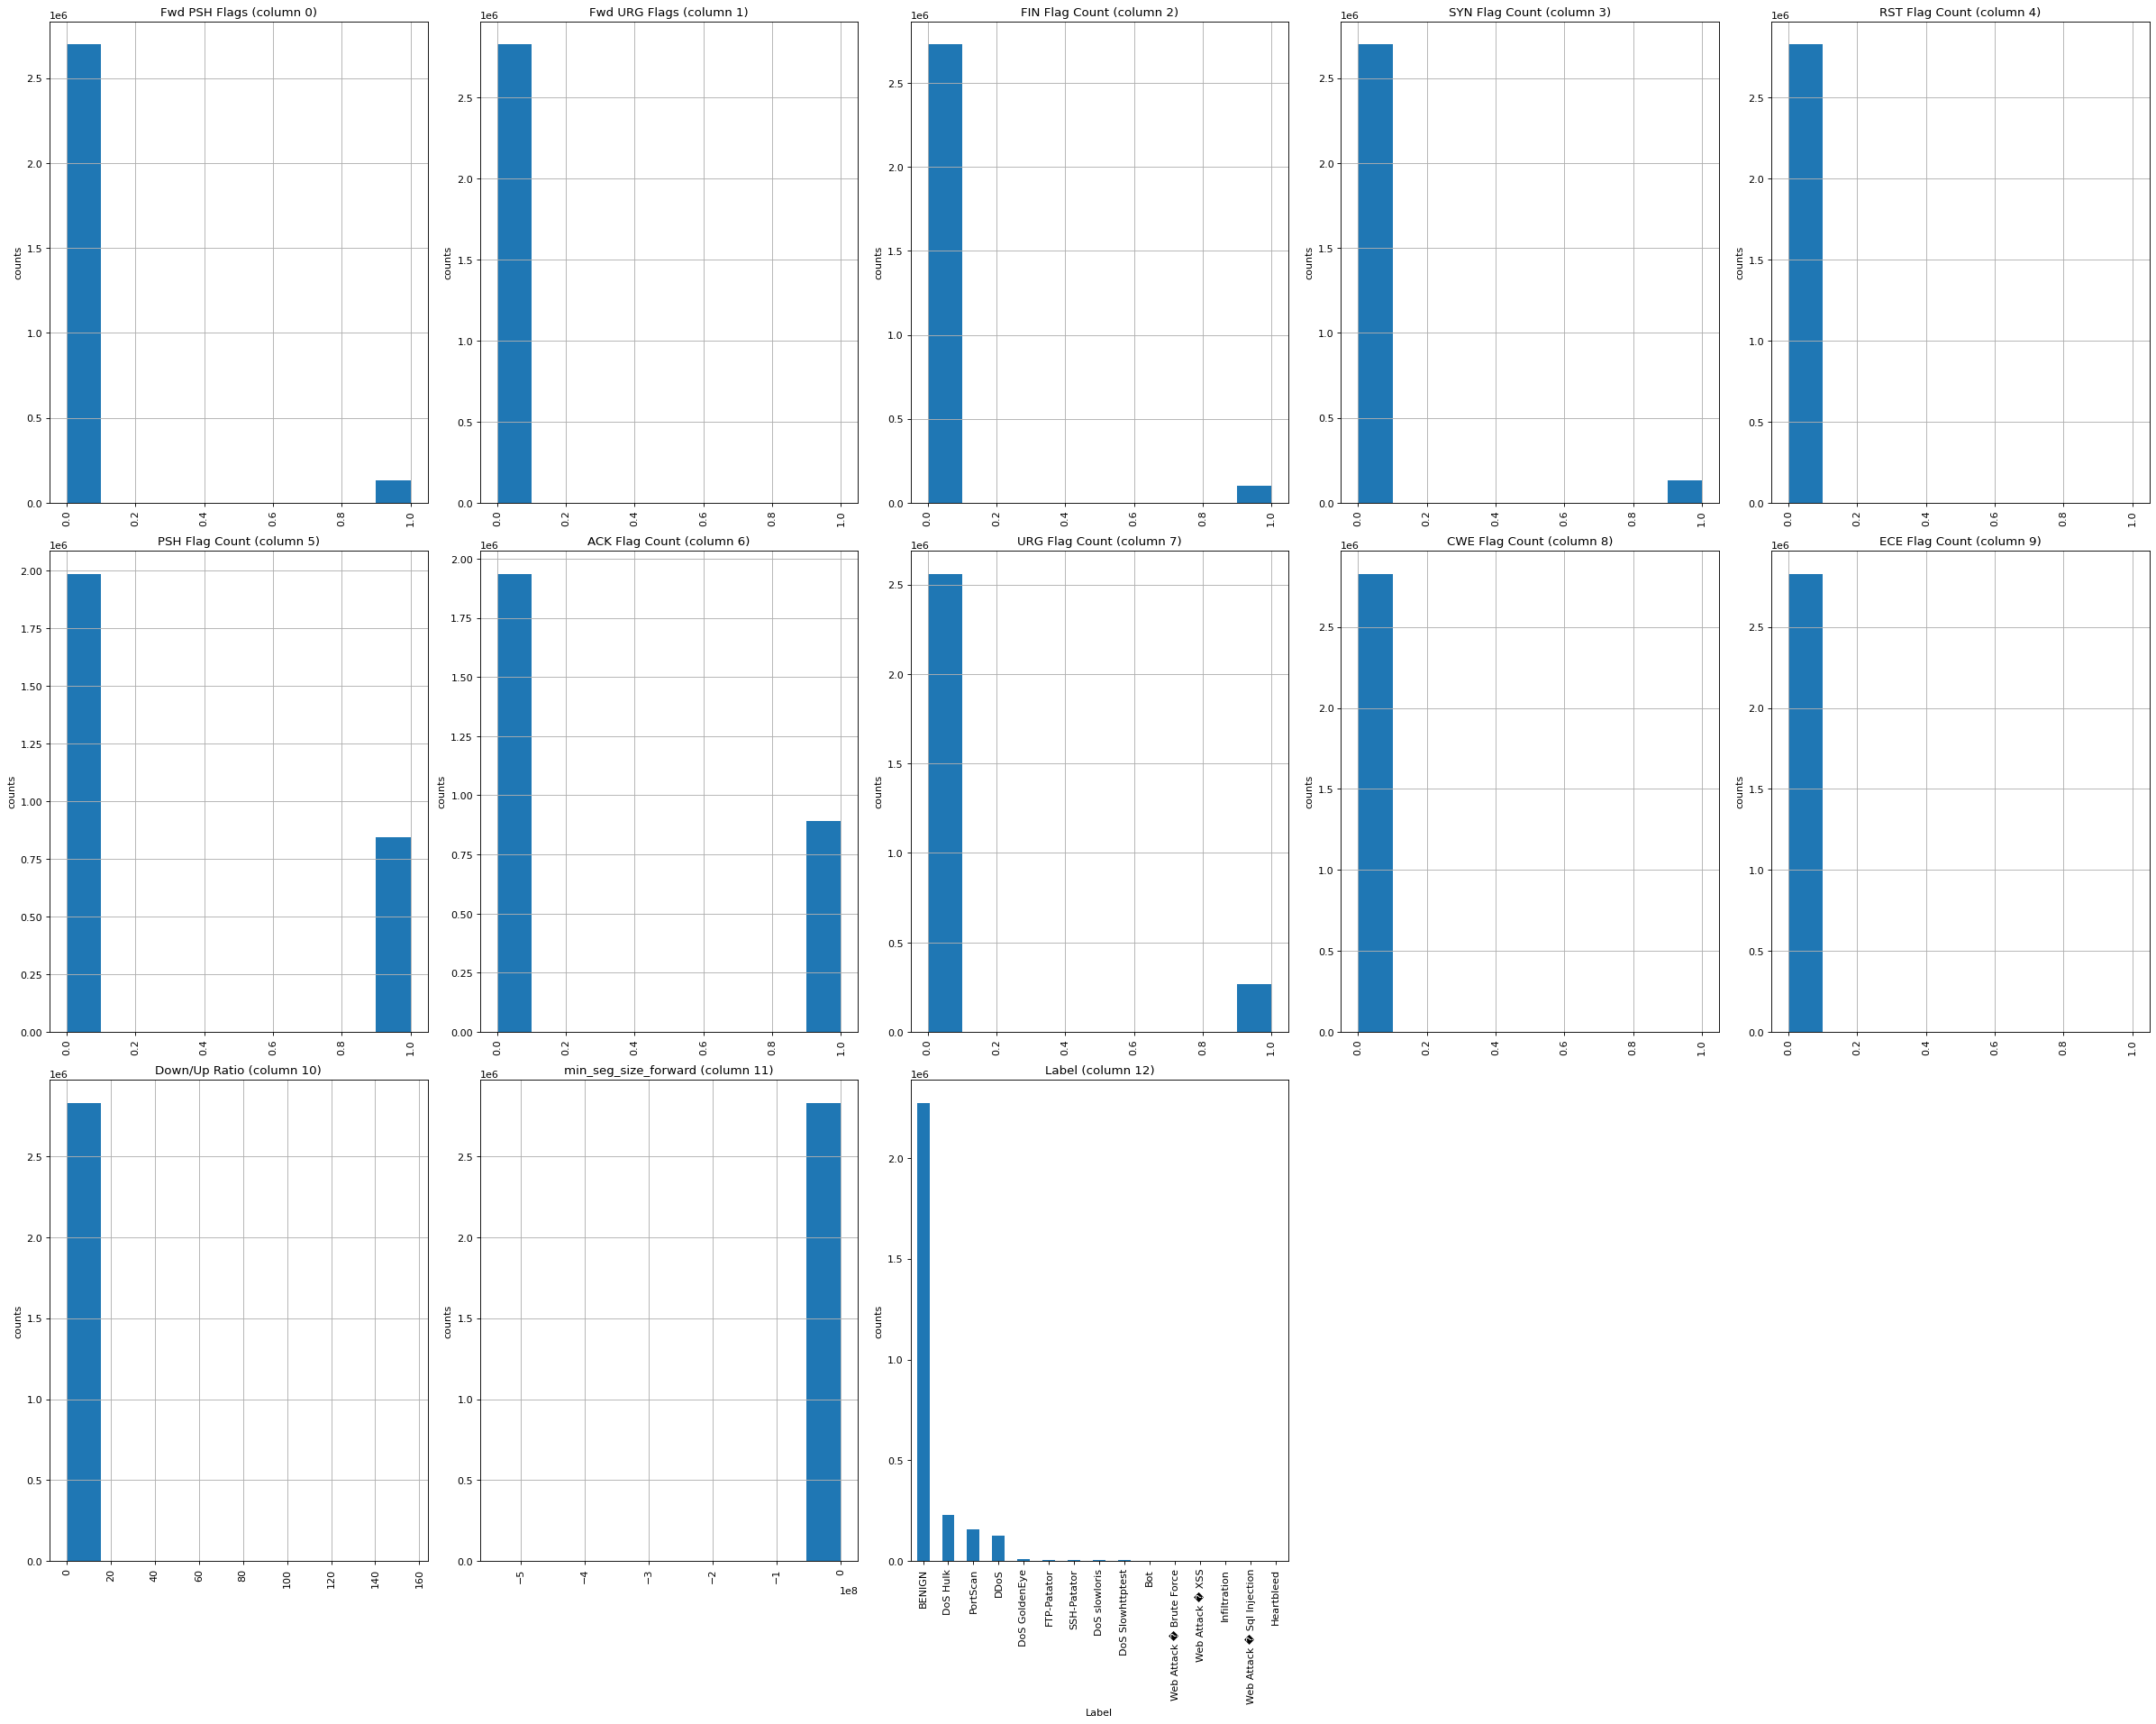

In [38]:
plt.rcParams['figure.figsize']=(30,30)
plot_per_column_distribution(df, 79, 5)


plot the bar graph


In [39]:
def bar_graph(feature):
  df[feature].value_counts().plot(kind="bar")


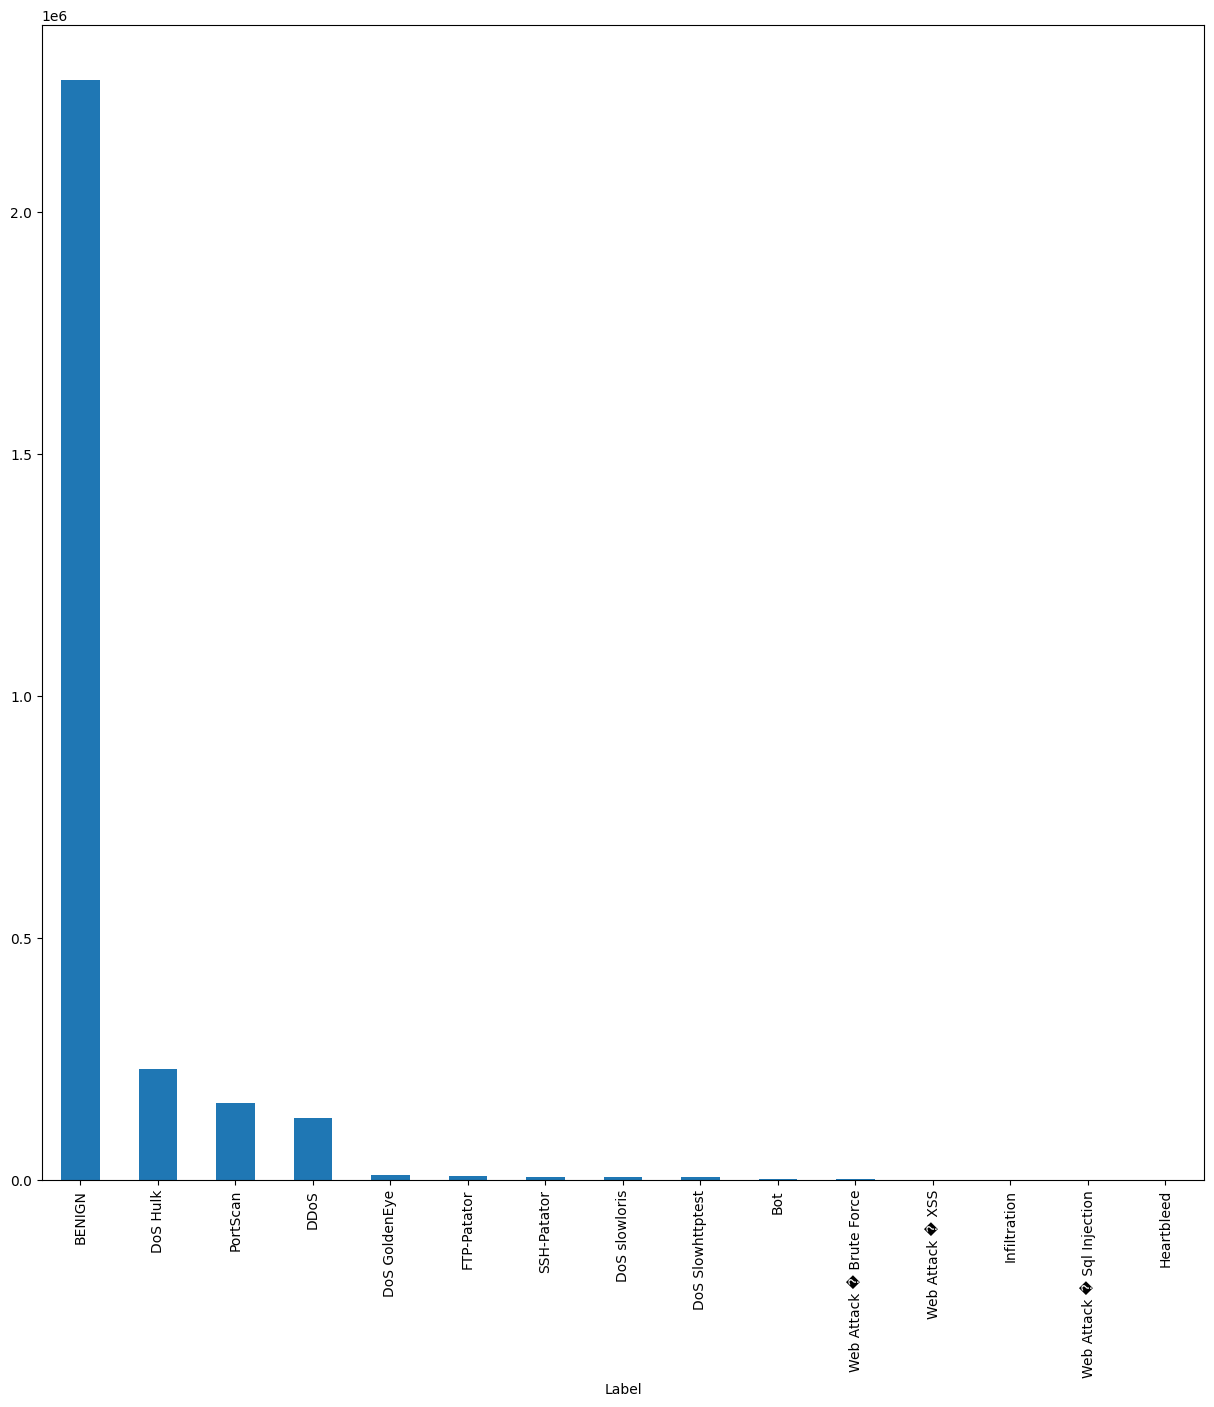

In [40]:
plt.rcParams['figure.figsize']=(15,15)
bar_graph("Label")

/tmp/ipython-input-1472158674.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(a=df['Flow Duration'])


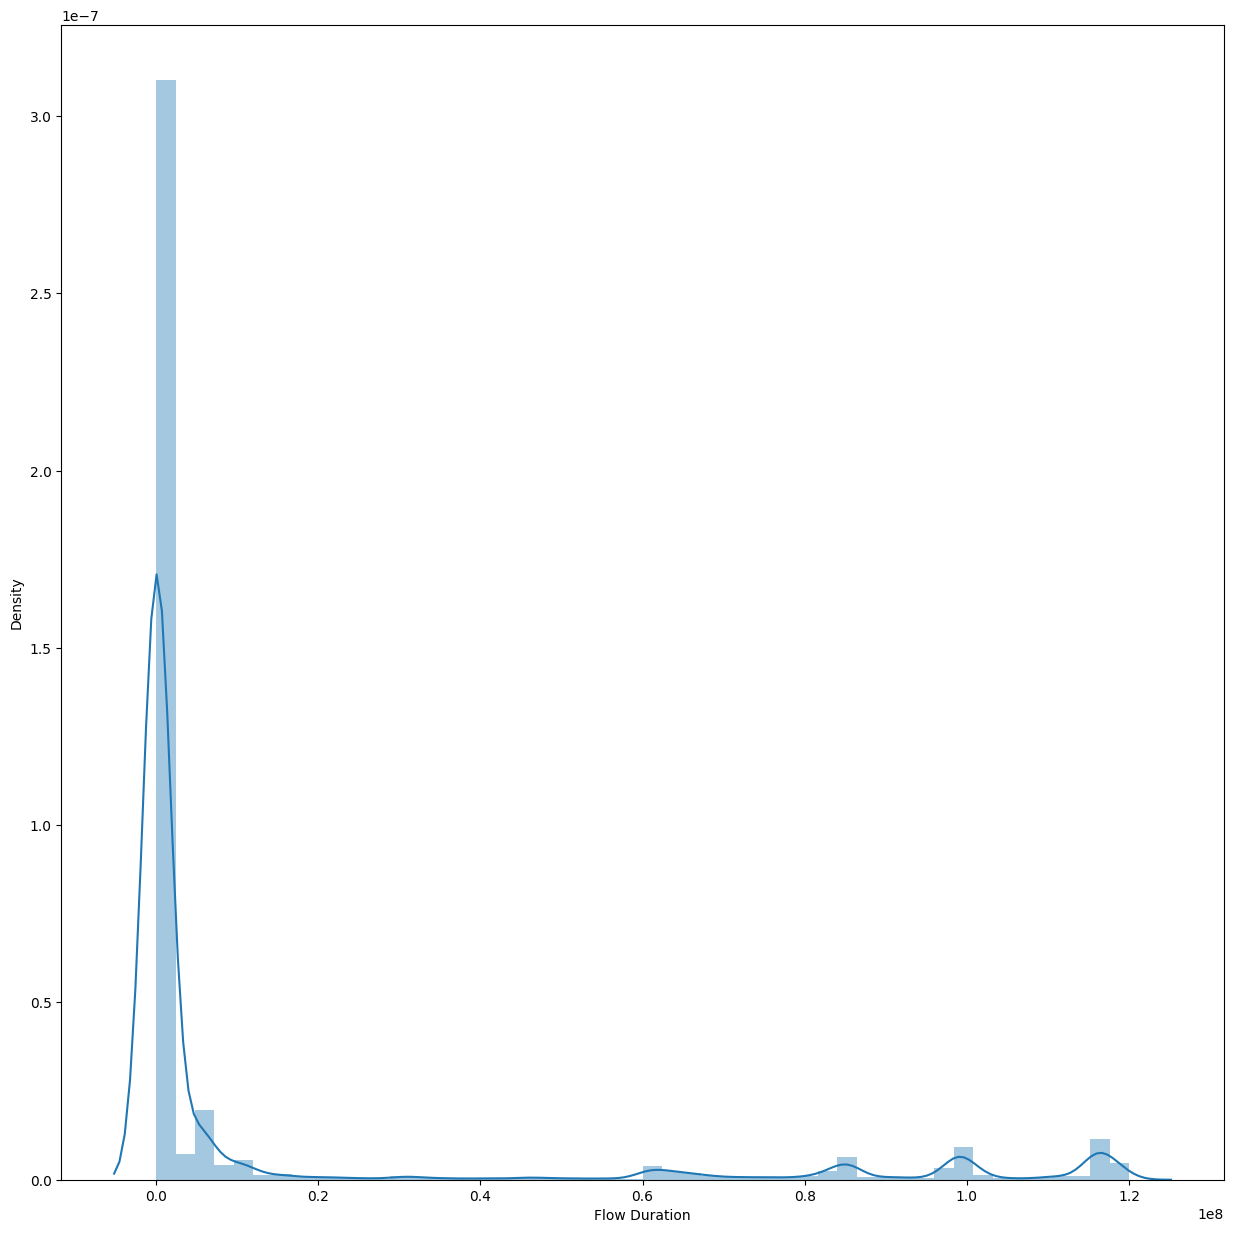

In [42]:
import seaborn as sns
p=sns.distplot(a=df['Flow Duration'])
plt.show()

plotting the piechart


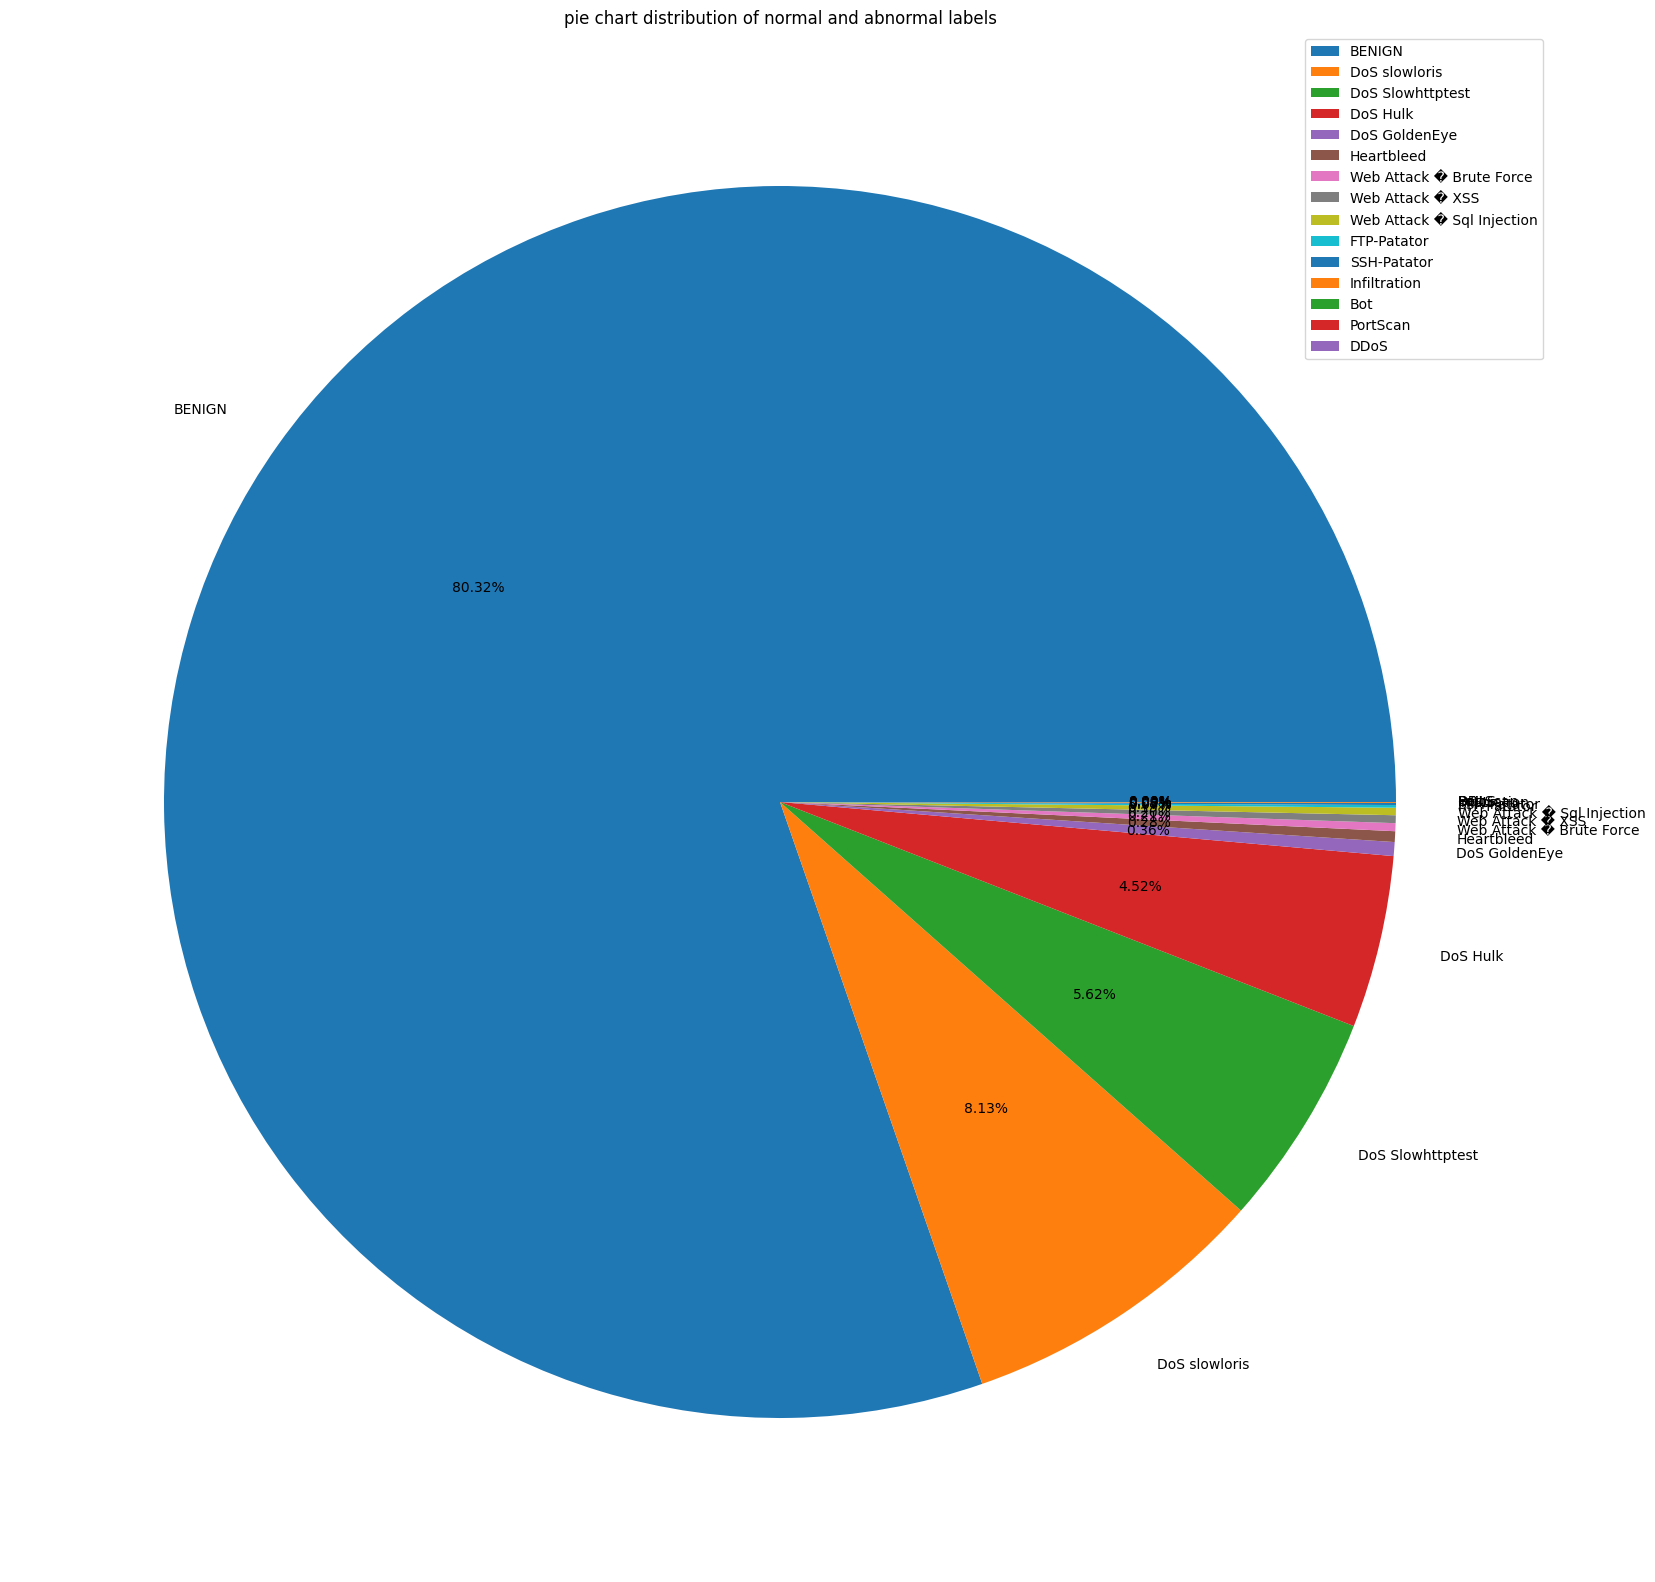

In [45]:
plt.figure(figsize=(20,20))
plt.pie(df['Label'].value_counts(),labels=df['Label'].unique(),autopct="%0.2f%%")
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

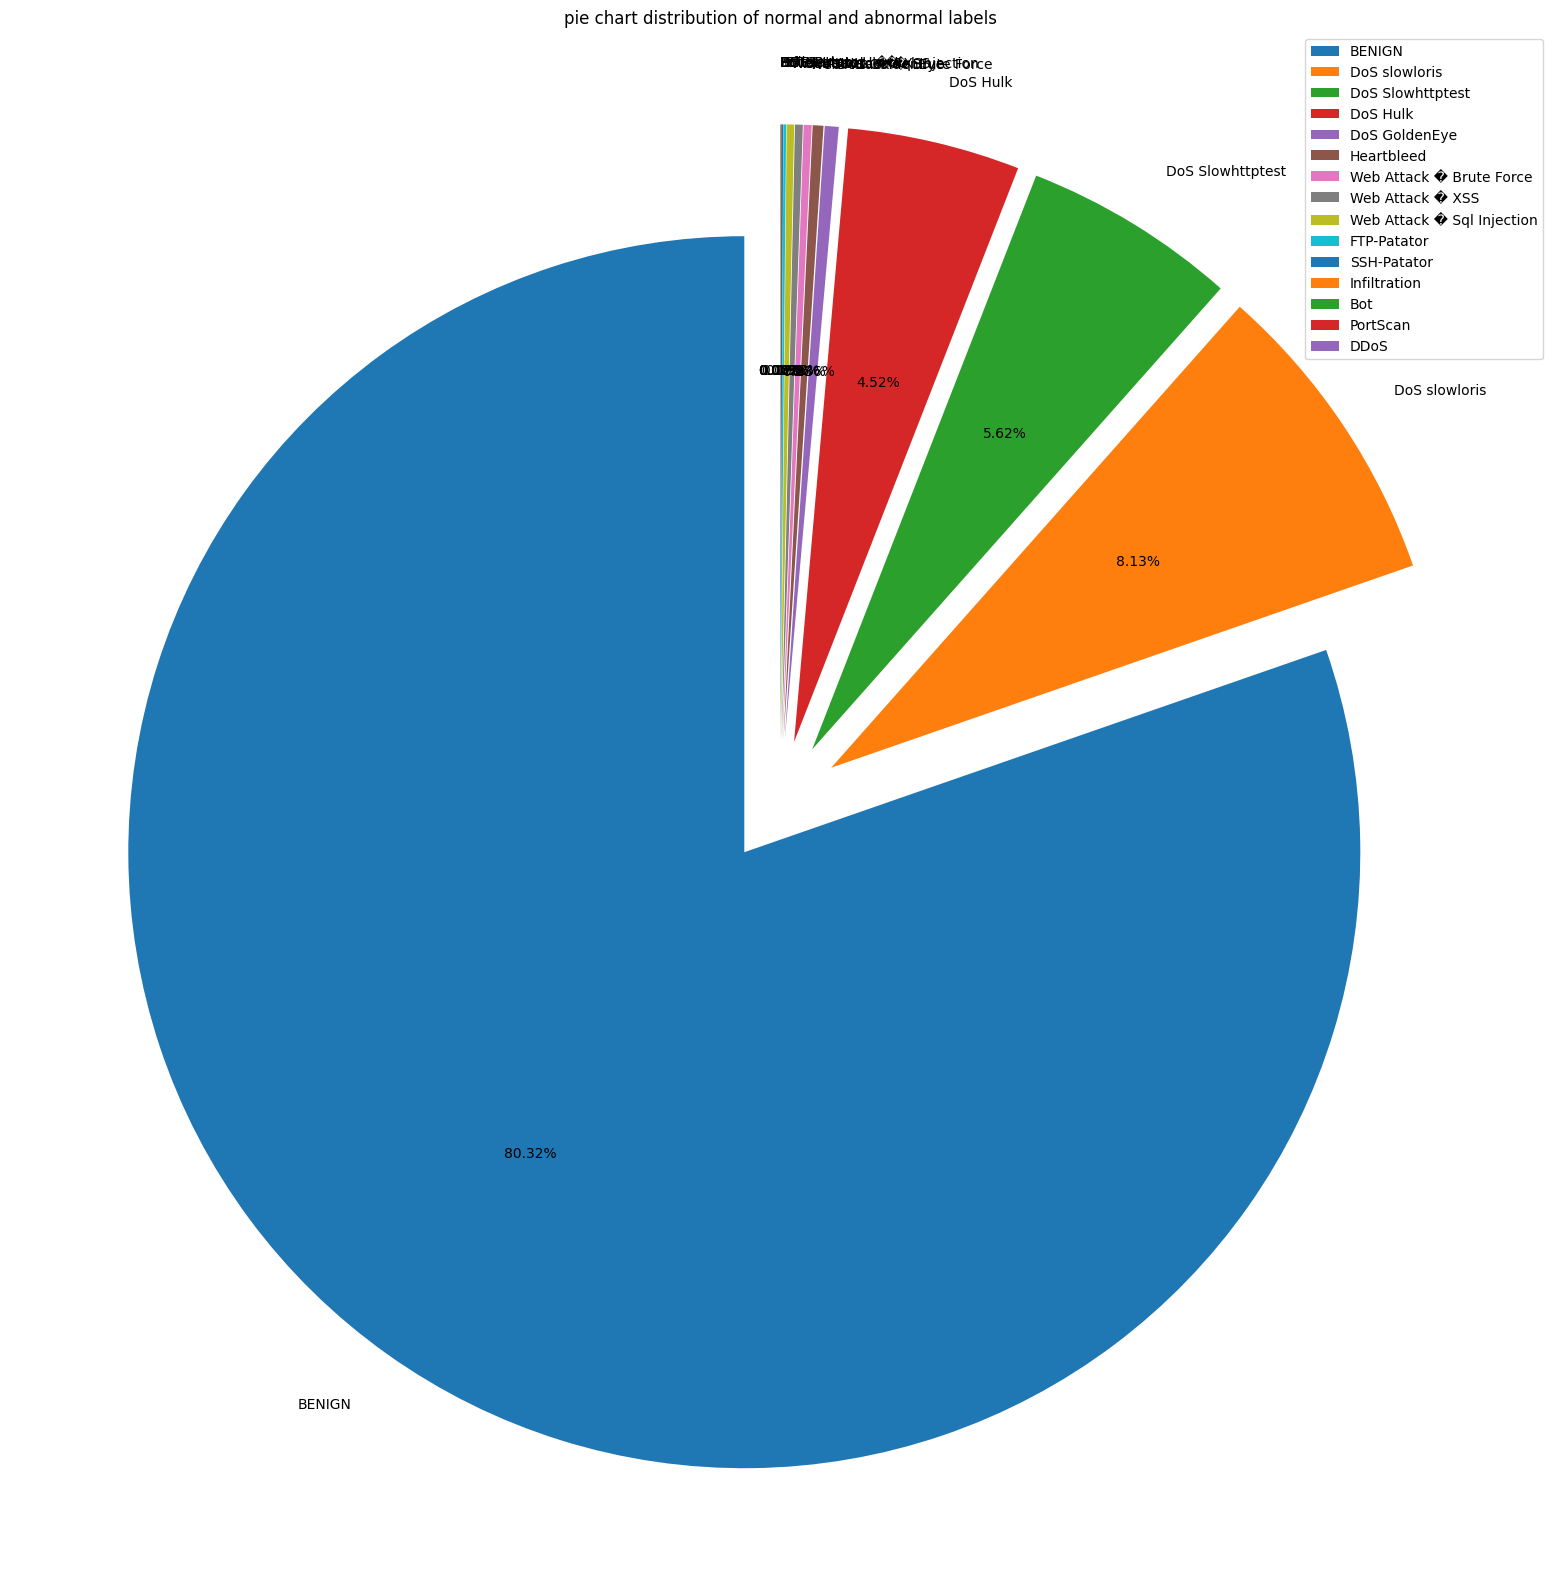

In [50]:
import matplotlib.pyplot as plt
#increase the figure size

plt.figure(figsize=(20,20))
#piechart distribution of normal and abnormal labels
labels=df['Label'].unique()
sizes=df['Label'].value_counts()
explode=(0.1,)*len(labels)#exploide all the slices slightly
plt.pie(sizes,labels=labels,autopct="%0.2f%%",explode=explode,startangle=90)
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend(labels,loc='best')
plt.show()

In [52]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


In [64]:
df.shape

(2520798, 79)

In [66]:
import pandas as pd
#assuming df is your datafram with the given dataset
#create a list of classes you want to keep all records for
classes_to_keep = ['DoS GoldenEye','FTP-Patator','DoS slowloris','DoS Slowhttptest',
                   'Bot','SSH-Patator','Web Attack � Brute Force','Web Attack � XSS',
                   'Infiltration','Web Attack � Sql Injection','Heartbleed']

#create  a list of classes you want to limit to 100000 records
classes_to_limit=['BENIGN','DoS Hulk','PortScan','DDoS']
#filter rows for classes to keep all records
df_keep=df[df['Label'].isin(classes_to_keep)]
#filter rows for classes to keep all records
df_limit=df[df['Label'].isin(classes_to_limit)].groupby("Label").head(50000)
#combine the filtered rows
result_df=pd.concat([df_keep,df_limit])
#shuffle the resulting dataframe to mix the classes
result_df=result_df.sample(frac=1,random_state=42).reset_index(drop=True)

In [67]:
result_df.shape

(234187, 79)

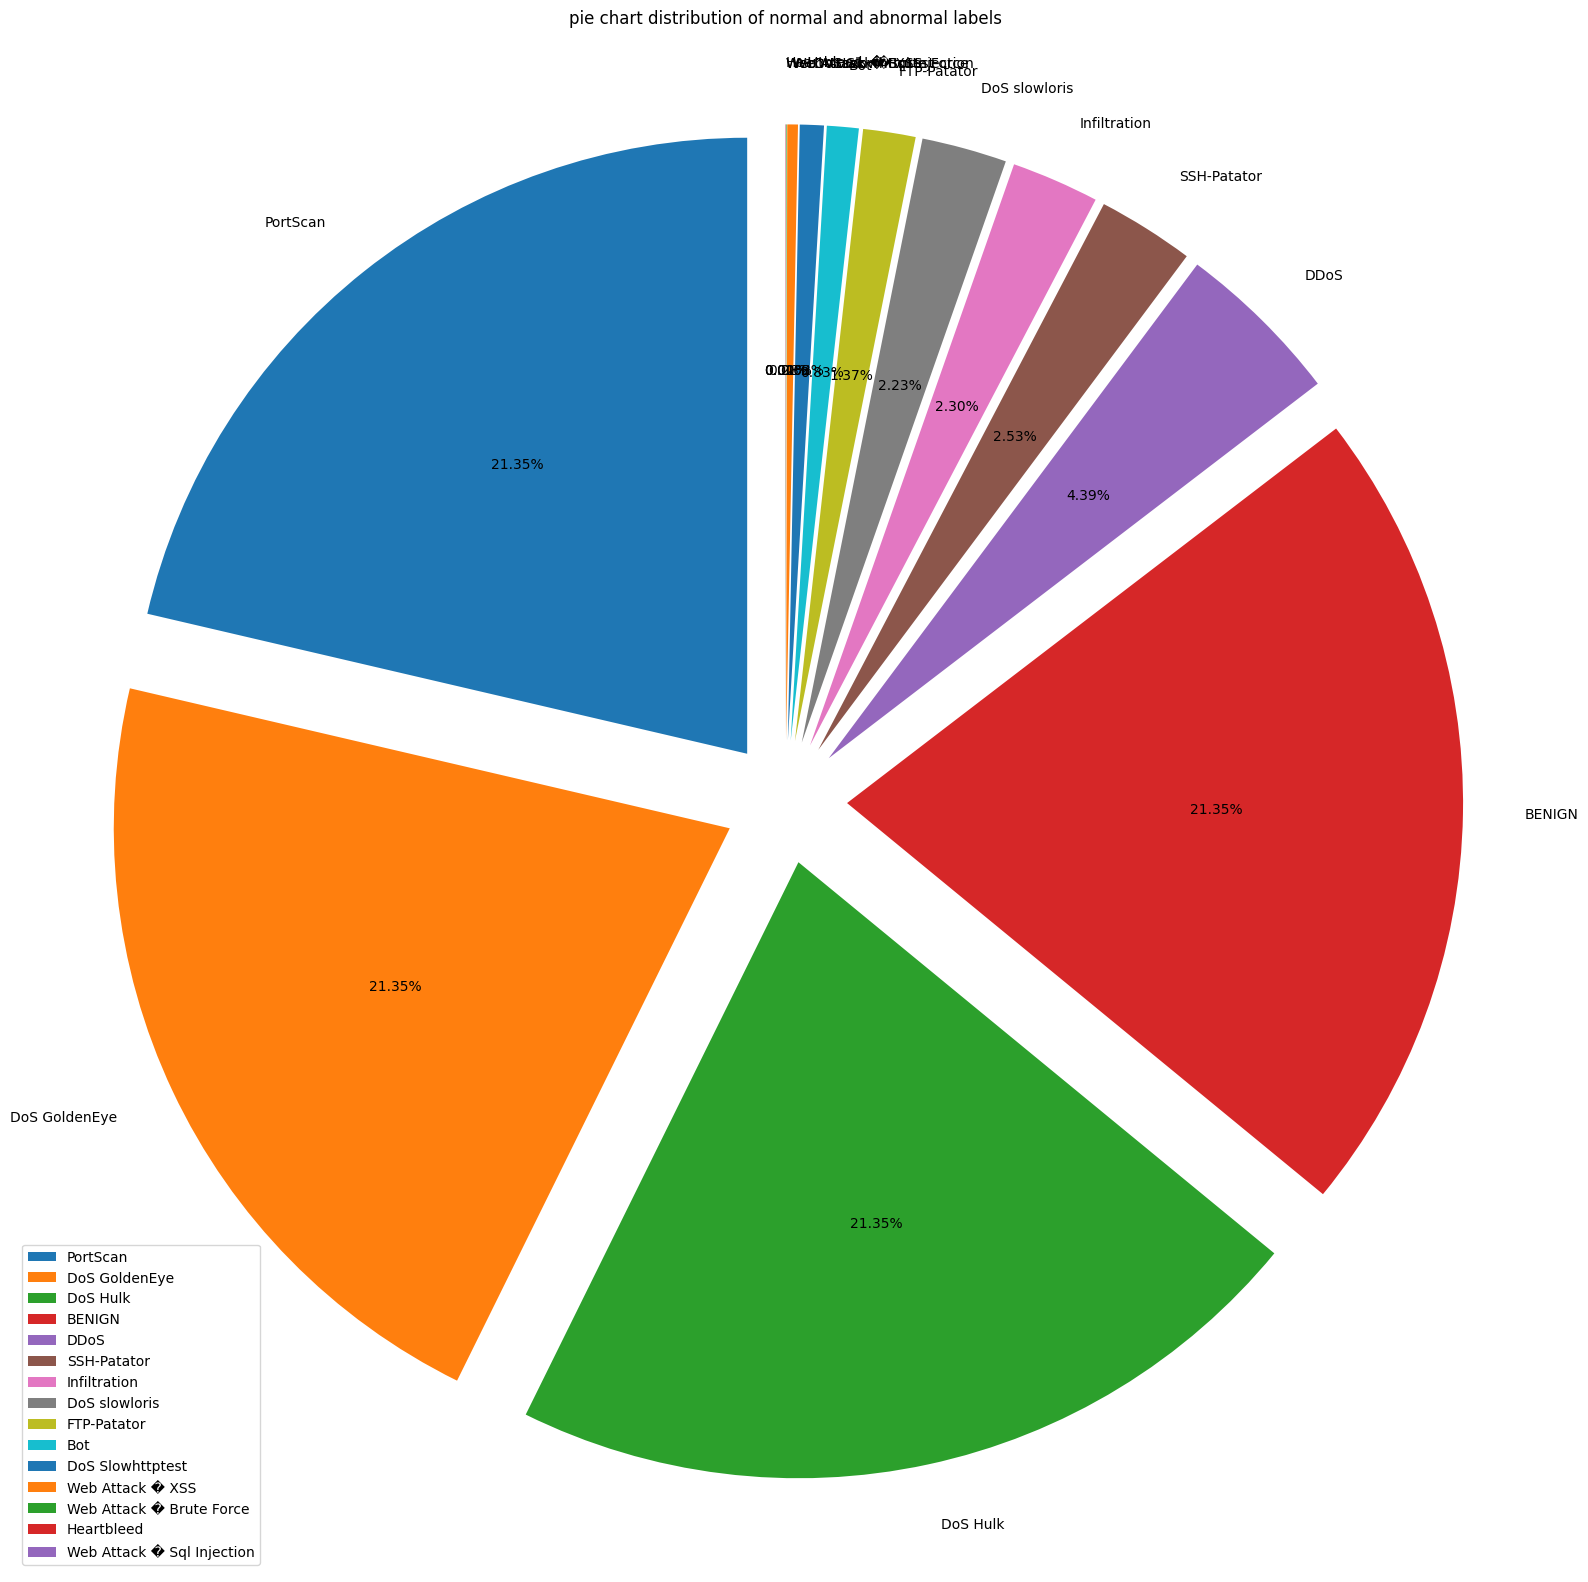

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
#pie chart distribution of normal and abnormal labels
labels=result_df['Label'].unique()
sizes=result_df['Label'].value_counts()
explode=(0.1,)*len(labels)#explode all slieces slightly
plt.pie(sizes,labels=labels,autopct="%0.2f%%",explode=explode,startangle=90)
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend(labels,loc='best')
plt.show()

Label encoding


In [69]:
from sklearn.preprocessing import LabelEncoder

#make acopy of your dataframe
df_encoded=result_df.copy()
#create alabel encoder object
le=LabelEncoder()
#fit and transform the label column and assign the transformed values to a new column
df_encoded['Label']=le.fit_transform(result_df['Label'])
#print the mapping of original labels to encoded values
label_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print(label_mapping)
#display the modified dataframe
print("\n Encoded datarame:")
df_encoded.head()

{'BENIGN': np.int64(0), 'Bot': np.int64(1), 'DDoS': np.int64(2), 'DoS GoldenEye': np.int64(3), 'DoS Hulk': np.int64(4), 'DoS Slowhttptest': np.int64(5), 'DoS slowloris': np.int64(6), 'FTP-Patator': np.int64(7), 'Heartbleed': np.int64(8), 'Infiltration': np.int64(9), 'PortScan': np.int64(10), 'SSH-Patator': np.int64(11), 'Web Attack � Brute Force': np.int64(12), 'Web Attack � Sql Injection': np.int64(13), 'Web Attack � XSS': np.int64(14)}

 Encoded datarame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10243,54,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,10
1,80,5002839,8,6,439,11632,439,0,54.875000,155.209938,...,32,0.0,0.0,0,0,0.0,0.0,0,0,3
2,80,97512230,7,5,397,11595,397,0,56.714286,150.051896,...,32,538.0,0.0,538,538,97500000.0,0.0,97500000,97500000,4
3,3945,43,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,10
4,443,107164673,9,8,617,5358,249,0,68.555556,100.437930,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
